<a href="https://colab.research.google.com/github/Lucas06-ux/DataSet_BMW/blob/main/CP5_IA_BMWDATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Definição do Problema

O objetivo principal deste projeto é desenvolver um modelo de classificação capaz de prever a categoria de preço de um carro BMW com base em suas características. O projeto terá três categorias de preço ('low', 'medium', 'high').

A análise e modelagem são importantes para entender os fatores que influenciam o preço dos carros BMW no mercado e podem ajudar em decisões comerciais, além de ter uma média e ideia de valor dos carros.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install kagglehub -q

In [3]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("ayeshaimran123/bmw-car-data-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bmw-car-data-analysis' dataset.
Path to dataset files: /kaggle/input/bmw-car-data-analysis


In [7]:
# Carregar o dataset a partir do arquivo baixado pelo KaggleHub
# O caminho retornado por kagglehub.dataset_download aponta para o diretório onde os arquivos foram baixados.
# O nome do arquivo CSV é 'bmw.csv'.
# Combinamos o caminho do diretório baixado com o nome do arquivo CSV.
import os

# O 'path' foi definido na célula anterior após o download do dataset.
# Verificamos se 'path' existe e se é um diretório
if 'path' in locals() and os.path.isdir(path):
    csv_file_path = os.path.join(path, 'bmw.csv')
    # Verifica se o arquivo CSV existe no caminho esperado
    if os.path.exists(csv_file_path):
        df_bmw = pd.read_csv(csv_file_path)
        print(f"Dataset carregado de: {csv_file_path}")
    else:
        print(f"Erro: O arquivo 'bmw.csv' não foi encontrado em {path}")
        print("Conteúdo do diretório baixado:", os.listdir(path))
else:
    print("Erro: O caminho do dataset baixado não foi encontrado ou não é um diretório.")
    print("Certifique-se de que a célula de download do KaggleHub foi executada corretamente.")

Dataset carregado de: /kaggle/input/bmw-car-data-analysis/bmw.csv


In [8]:
df_bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


## Descrição do Dataset

O dataset usado no projeto tem informações sobre carros da BMW e foi carregado a partir de um download realizado via KaggleHub.

O dataset possui **10781 linhas** e **9 colunas**, usando o (`df_bmw.shape`).

As colunas presentes no dataset são:

*   **model**: O modelo do carro BMW.
*   **year**: O ano de fabricação do carro.
*   **price**: O preço do carro.
*   **transmission**: O tipo de transmissão do carro .
*   **mileage**: A quilometragem percorrida pelo carro.
*   **fuelType**: O tipo de combustível utilizado pelo carro .
*   **tax**: O valor do imposto do carro.
*   **mpg**: Milhas por galão
*   **engineSize**: O tamanho do motor do carro.

O dataset **não possui valores ausentes** pois ao usar o (`df_bmw.isnull().sum()`) mostra que não há. As estatísticas descritivas (`df_bmw.describe()`) forneceram um resumo numérico das colunas. Os gráficos ajudam a entender a composição e característica do dataset.

Checando as informações do DataSet

In [9]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [10]:
df_bmw.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [11]:
df_bmw.shape

(10781, 9)

In [12]:
df_bmw.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [13]:
df_bmw['price_category'] = pd.cut(df_bmw['price'], bins=[0, 20000, 40000, 100000],
                                  labels=['low', 'medium', 'high'])

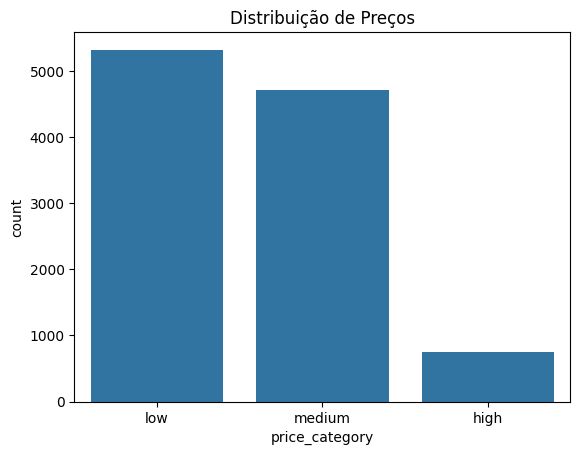

In [14]:
sns.countplot(x='price_category', data=df_bmw)
plt.title('Distribuição de Preços')
plt.show()

In [15]:
df_bmw.price_category.value_counts()

,count
price_category,
low,5323
medium,4707
high,750


In [16]:
df_bmw.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_category
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,low
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,medium
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,low
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,low
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,low
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0,low
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0,low
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5,low
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0,low
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0,low


In [17]:
df = pd.get_dummies(df_bmw, columns=['transmission', 'fuelType'], drop_first=False)

In [18]:
display(df_bmw.head())
display(df.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_category
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,low
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,medium
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,low
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,low
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,low


,model,year,price,mileage,tax,mpg,engineSize,price_category,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,5 Series,2014,11200,67068,125,57.6,2.0,low,True,False,False,True,False,False,False,False
1,6 Series,2018,27000,14827,145,42.8,2.0,medium,True,False,False,False,False,False,False,True
2,5 Series,2016,16000,62794,160,51.4,3.0,low,True,False,False,True,False,False,False,False
3,1 Series,2017,12750,26676,145,72.4,1.5,low,True,False,False,True,False,False,False,False
4,7 Series,2014,14500,39554,160,50.4,3.0,low,True,False,False,True,False,False,False,False


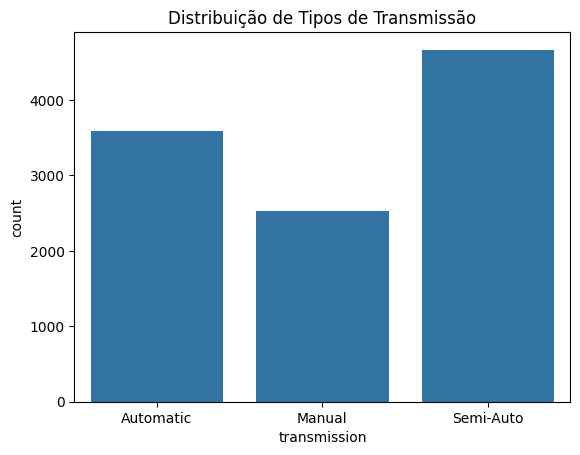

In [19]:
sns.countplot(x='transmission', data=df_bmw)
plt.title('Distribuição de Tipos de Transmissão')
plt.show()

In [20]:
df_bmw.transmission.value_counts()

,count
transmission,
Semi-Auto,4666
Automatic,3588
Manual,2527


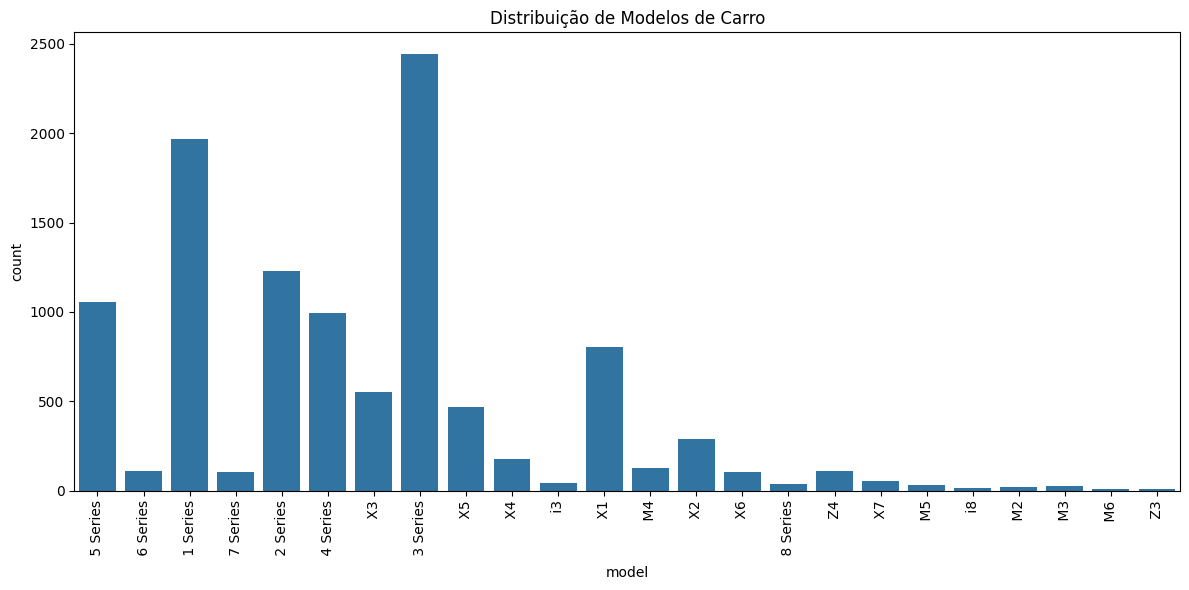

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=df_bmw)
plt.title('Distribuição de Modelos de Carro')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
df_bmw.model.value_counts()

,count
model,
3 Series,2443
1 Series,1969
2 Series,1229
5 Series,1056
4 Series,995
X1,804
X3,551
X5,468
X2,288


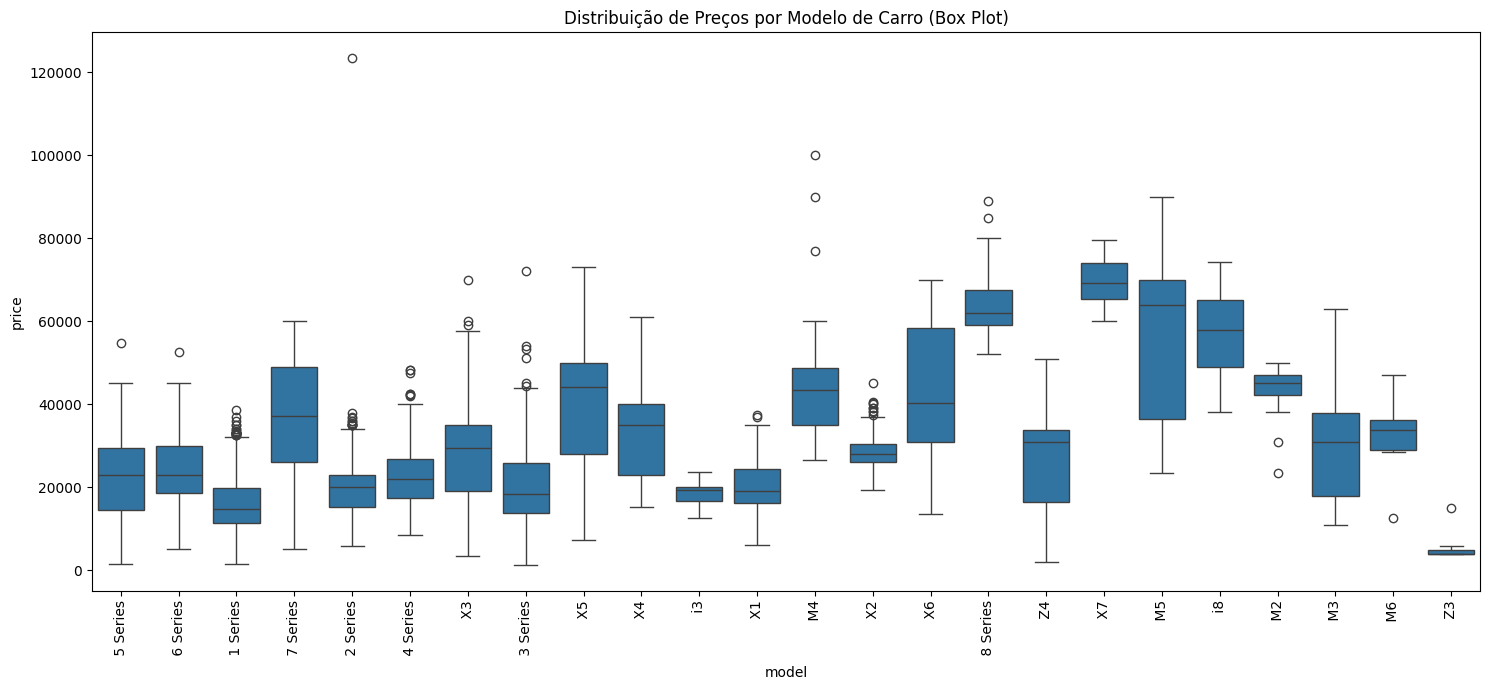

In [23]:
plt.figure(figsize=(15, 7)) # Ajusta o tamanho da figura
sns.boxplot(x='model', y='price', data=df_bmw)
plt.title('Distribuição de Preços por Modelo de Carro (Box Plot)')
plt.xticks(rotation=90) # Rota os rótulos do eixo x
plt.tight_layout() # Ajusta o layout
plt.show()

In [24]:
average_price_by_model = df_bmw.groupby('model')['price'].mean().sort_values(ascending=False)

Para uma visualização gráfica, podemos usar um gráfico de barras para mostrar a média de preços por modelo.

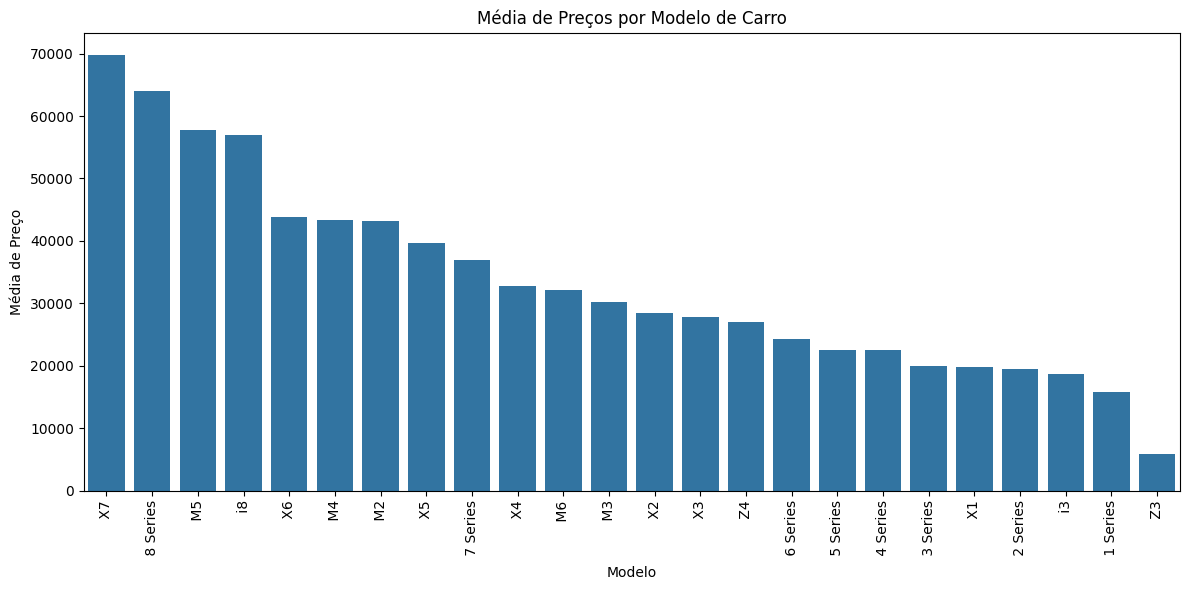

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_model.index, y=average_price_by_model.values)
plt.title('Média de Preços por Modelo de Carro')
plt.xlabel('Modelo')
plt.ylabel('Média de Preço')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:

Q1 = df_bmw['price'].quantile(0.25)
Q3 = df_bmw['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25º percentil): {Q1}")
print(f"Q3 (75º percentil): {Q3}")
print(f"IQR: {IQR}")
print(f"Limite Inferior para Outliers: {lower_bound}")
print(f"Limite Superior para Outliers: {upper_bound}")


outliers = df_bmw[(df_bmw['price'] < lower_bound) | (df_bmw['price'] > upper_bound)]

print(f"\nNúmero de Outliers identificados: {len(outliers)}")
print("Exemplos de Outliers:")
display(outliers.head())


Q1 (25º percentil): 14950.0
Q3 (75º percentil): 27940.0
IQR: 12990.0
Limite Inferior para Outliers: -4535.0
Limite Superior para Outliers: 47425.0

Número de Outliers identificados: 484
Exemplos de Outliers:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_category
168,X5,2020,54998,Semi-Auto,1500,Diesel,150,37.7,3.0,high
189,8 Series,2019,61898,Semi-Auto,2650,Diesel,145,39.8,3.0,high
241,X7,2020,78000,Semi-Auto,5000,Diesel,150,31.4,3.0,high
248,X3,2019,56000,Semi-Auto,26,Petrol,145,24.8,3.0,high
266,7 Series,2020,53000,Semi-Auto,6555,Diesel,145,42.2,3.0,high


In [27]:

Q1_encoded = df['price'].quantile(0.25)
Q3_encoded = df['price'].quantile(0.75)
IQR_encoded = Q3_encoded - Q1_encoded

lower_bound_encoded = Q1_encoded - 1.5 * IQR_encoded
upper_bound_encoded = Q3_encoded + 1.5 * IQR_encoded

print(f"Q1 (25º percentil) no DataFrame encodado: {Q1_encoded}")
print(f"Q3 (75º percentil) no DataFrame encodado: {Q3_encoded}")
print(f"IQR no DataFrame encodado: {IQR_encoded}")
print(f"Limite Inferior para Outliers no DataFrame encodado: {lower_bound_encoded}")
print(f"Limite Superior para Outliers no DataFrame encodado: {upper_bound_encoded}")

df_cleaned = df[(df['price'] >= lower_bound_encoded) & (df['price'] <= upper_bound_encoded)].copy()

print(f"\nNúmero total de linhas no DataFrame original (encodado): {len(df)}")
print(f"Número de linhas após remover outliers: {len(df_cleaned)}")

print("\nPrimeiras 5 linhas do DataFrame após remover outliers:")
display(df_cleaned.head())

Q1 (25º percentil) no DataFrame encodado: 14950.0
Q3 (75º percentil) no DataFrame encodado: 27940.0
IQR no DataFrame encodado: 12990.0
Limite Inferior para Outliers no DataFrame encodado: -4535.0
Limite Superior para Outliers no DataFrame encodado: 47425.0

Número total de linhas no DataFrame original (encodado): 10781
Número de linhas após remover outliers: 10297

Primeiras 5 linhas do DataFrame após remover outliers:


,model,year,price,mileage,tax,mpg,engineSize,price_category,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,5 Series,2014,11200,67068,125,57.6,2.0,low,True,False,False,True,False,False,False,False
1,6 Series,2018,27000,14827,145,42.8,2.0,medium,True,False,False,False,False,False,False,True
2,5 Series,2016,16000,62794,160,51.4,3.0,low,True,False,False,True,False,False,False,False
3,1 Series,2017,12750,26676,145,72.4,1.5,low,True,False,False,True,False,False,False,False
4,7 Series,2014,14500,39554,160,50.4,3.0,low,True,False,False,True,False,False,False,False



### Normalização/Padronização das Variáveis Numéricas no DataFrame Limpo (`df_cleaned`)

Padronizando as variáveis numéricas no DataFrame `df_cleaned` utilizando `StandardScaler`.

In [28]:
from sklearn.preprocessing import StandardScaler



numerical_cols_cleaned = ['year', 'mileage', 'tax', 'mpg', 'engineSize']


df_model_ready = df_cleaned.copy()


scaler = StandardScaler()


df_model_ready[numerical_cols_cleaned] = scaler.fit_transform(df_model_ready[numerical_cols_cleaned])

display(df_model_ready.head())

,model,year,price,mileage,tax,mpg,engineSize,price_category,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,5 Series,-1.265903,11200,1.605129,-0.096807,0.011378,-0.243882,low,True,False,False,True,False,False,False,False
1,6 Series,0.431142,27000,-0.460719,0.221845,-0.460101,-0.243882,medium,True,False,False,False,False,False,False,True
2,5 Series,-0.417381,16000,1.436116,0.460834,-0.186133,1.686662,low,True,False,False,True,False,False,False,False
3,1 Series,0.006881,12750,0.007845,0.221845,0.482858,-1.209154,low,True,False,False,True,False,False,False,False
4,7 Series,-1.265903,14500,0.517100,0.460834,-0.217990,1.686662,low,True,False,False,True,False,False,False,False


In [29]:
from sklearn.model_selection import train_test_split

X = df_model_ready.drop(['model', 'price', 'price_category'], axis=1)
y = df_model_ready['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8766990291262136
Precision: 0.8759021146844069
Recall: 0.8766990291262136
F1 Score: 0.8753968804415315


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Métricas do modelo Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Métricas do modelo Random Forest:
Accuracy: 0.9092233009708738
Precision: 0.9093697427232139
Recall: 0.9092233009708738
F1 Score: 0.9091606975937365


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Métricas do modelo Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Métricas do modelo Support Vector Machine (SVM):
Accuracy: 0.8995145631067961
Precision: 0.8984303397358094
Recall: 0.8995145631067961
F1 Score: 0.8986215804319263


### Matriz de Confusão dos Modelos

Visualizando a matriz de confusão de cada modelo para entender melhor as previsões.

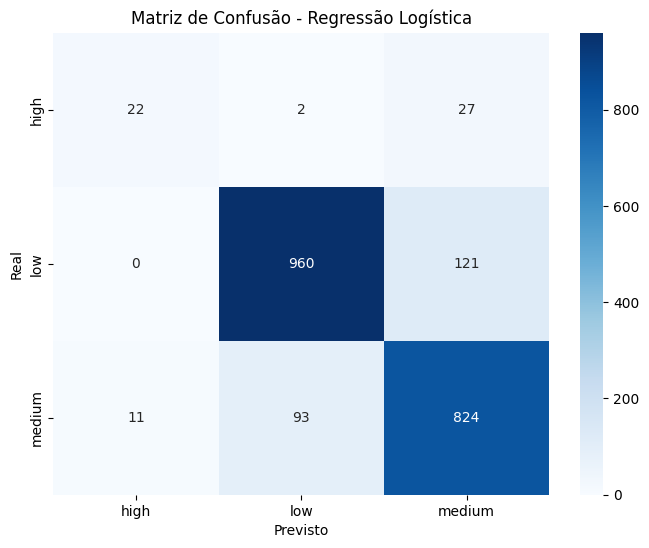

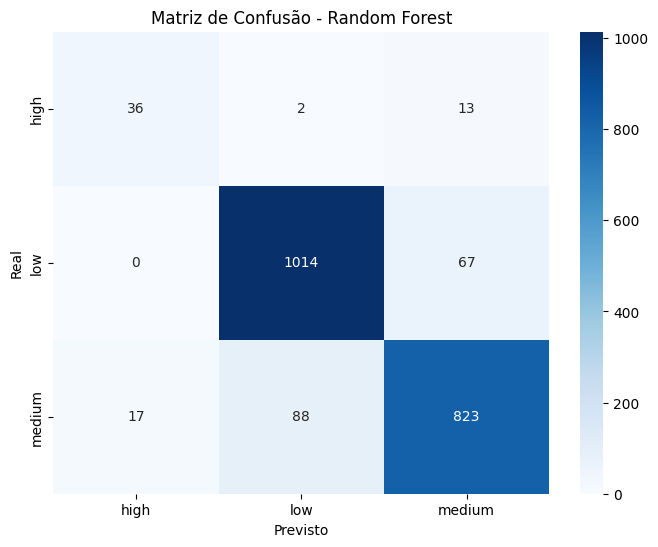

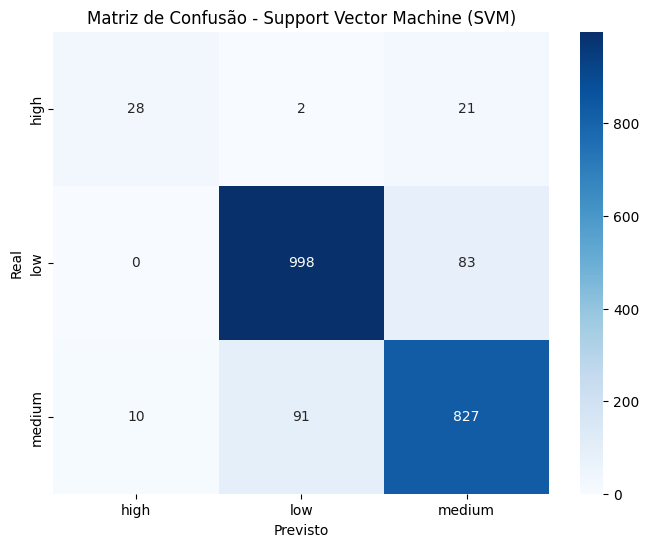

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Matriz de Confusão - Support Vector Machine (SVM)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## 6. Interpretação dos Resultados

Analisando o desempenho dos modelos treinados e justificando a escolha do modelo final para a classificação da categoria de preço de carros BMW.

### Análise Comparativa dos Modelos

Com base nas avaliações (Acurácia, Precisão, Recall, F1-Score) e nas Matrizes de Confusão para a Regressão Logística, Random Forest e Support Vector Machine (SVM), da para ver que:

*   **Regressão Logística:** O modelo de Regressão Logística obteve uma acurácia de aproximadamente 87.7%. Observando a matriz de confusão, ele teve um bom desempenho na classificação das classes 'low' e 'medium', mas apresentou mais erros na classificação da classe 'high', que é a menos representada no dataset.
*   **Random Forest:** O modelo Random Forest demonstrou o melhor desempenho geral, com uma acurácia de cerca de 90.9%. As métricas de precisão, recall e F1-score também foram as mais altas entre os três modelos. A matriz de confusão mostra que ele classificou corretamente a maioria das instâncias em todas as classes, incluindo a classe 'high', com menos erros em comparação com a Regressão Logística.
*   **Support Vector Machine (SVM):** O modelo SVM alcançou uma acurácia de aproximadamente 89.9%. Suas métricas foram ligeiramente inferiores às do Random Forest, mas ainda melhores que as da Regressão Logística. A matriz de confusão do SVM também indica um bom desempenho geral, com uma capacidade razoável de distinguir entre as classes.

### Justificativa do Modelo Final Escolhido

Considerando a análise comparativa acima, o modelo **Random Forest** foi selecionado como o melhor para este problema de classificação. As razões para esta escolha incluem:

*   Com base nas avaliações (Acurácia, Precisão, Recall e F1-Score), o Random Forest apresentou os melhores resultados em comparação com a Regressão Logística e o SVM, indicando uma maior capacidade de prever corretamente a categoria de preço dos carros.

Ou seja, o modelo Random Forest apresenta o desempenho mais adequado para prever a categoria de preço dos carros BMW com base nas características fornecidas no dataset.

## Principais aprendizados

* A maioria dos carros no dataset se concentra nas categorias de preço 'low' e 'medium', com menos carros na categoria 'high'. Isso sugere que a maior parte do mercado de carros BMW neste dataset está nas faixas de preço mais baixas e intermediárias.

* Modelos Populares: Alguns modelos, como "3 Series", "1 Series" e "2 Series", aparecem com maior frequência no dataset, indicando que são modelos mais comuns ou populares.

* Relação entre Modelo e Preço: A análise da média de preços por modelo e o box plot mostram que há uma variação significativa nos preços entre os diferentes modelos. Modelos como X7, 8 Series e M5 tendem a ter preços médios mais altos, enquanto modelos como 1 Series e Z3 têm preços médios mais baixos. Isso é esperado, pois modelos de luxo ou de alta performance geralmente custam mais.

## Possiveis melhorias futuras

* **Otimização de Hiperparâmetros:** Ajustar os parâmetros dos modelos usados (como o Random Forest) para tentar obter um desempenho ainda melhor.

* **Técnicas para Lidar com Desbalanceamento de Classes:** A classe 'high' é menos comum. Usar métodos para equilibrar as classes pode ajudar o modelo a prever melhor essa categoria.